##### (SUPERVISED LEARNING EXAMPLE)

**Amaç:** çok değişkenli verinin ana özelliklerini daha az sayıda diğişken/bileşen ile temsiz etmektir. 

-En büyük varyansa sahip olanlar asal/temel bileşenlerdir.
- Az miktarda veri kaybı göze alınarak değişken boyutu azaltılır.

**Özellikle regresyon modellerinde multicollinearityi önlemek için kullanılır. Çünkü PCA sonucu ortaya çıkan bileşenler arasında korelasyon yoktur.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [28]:
df = pd.read_csv("../Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
df=StandardScaler().fit_transform(df)

In [58]:
df[0:2, 0:17]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292,
        -0.0975271 ,  1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 ,
        -0.12167086,  0.25896561,  0.43533435,  1.22149851, -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962,
         1.6093726 , -0.90120024, -0.45286539, -0.4098921 , -0.07605382,
        -0.41510491, -0.19959036,  0.010373  ,  2.10910888, -0.25386267,
         0.81996395, -0.12420791]])

In [44]:
df.shape

(263, 17)

In [60]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [64]:
pca

PCA(n_components=2)

In [66]:
pca_fit = pca.fit_transform(df)

In [68]:
principle_df = pd.DataFrame(data = pca_fit, columns=["firt_principle", "sec_principle"])

In [70]:
principle_df

,firt_principle,sec_principle
0,0.076848,-1.653525
1,0.337127,2.320560
2,3.408362,-0.755757
3,-2.642221,0.361486
4,1.071681,1.511674
...,...,...
258,-0.152111,0.331665
259,3.241373,0.391942
260,-1.206322,0.625714
261,2.084856,2.059851


In [74]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

- birinci bileşence veri setinin içinde bulunan değişkenliğin %45i, bileşence veri setinin içinde bulunan değişkenliğin %24ü açıklanabilmiş. Yaklaşık %70tir.

- Yani veri setinin içersindeki değişkenliğin %70ini bu iki bileşenle açıklayabiliyoruz demek. Bu makul bir durum.

In [83]:
pca.components_[1]

array([ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
        0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
       -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
        0.20978299,  0.05452611])

In [85]:
# optimum bileşen sayısına karar verelim

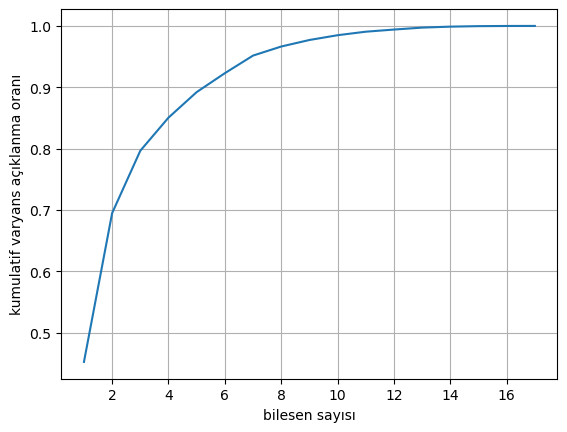

In [93]:
# pca.explained_variance_ratio_ --> bu ifade değişken sayısı kadar bileşen oluşturur. Bunların kümülatif toplanlarını alıp en az kaç bileşenle en çok yüzde kaç açıklanabilirliğe ulaşabiliriz burda bakabiliriz
pca = PCA().fit(df)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("bilesen sayısı")
plt.ylabel("kumulatif varyans açıklanma oranı")
plt.grid(True)


In [99]:
pca.explained_variance_ratio_
#yukarıdaki grafik bunların sıra ile toplanması

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [116]:
# final
pca = PCA(n_components=5)
pca_fit = pca.fit_transform(df)

In [118]:
pca.explained_variance_ratio_.sum()

0.8921682164900536

- Bileşen sayısı/özellik sayısı < %50	Karmaşıklık düşük demektir. Bu bilgi de component seçimi konusunda bilgi verir
- yani:

Toplam bileşen sayısı 4 ise, 1 bileşen = %25 oran

Toplam bileşen sayısı 17 ise, 1 bileşen ≈ %5.9 oran

Yani:

17 bileşenli bir veride 5 bileşen almak ≈ %29 karmaşıklık ama %89 açıklama → çok iyi!

5 bileşen, toplam değişkenlerin sadece %29’unu temsil ediyor, ama neredeyse tüm bilgiyi taşıyor.